## Andrew Lin and Kaleb Getachew

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

comments = pd.read_csv("toxic_comments.csv")
comments

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
159566,and for the second time of asking when your ...,ffe987279560d7ff,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159567,you should be ashamed of yourself that is a ho...,ffea4adeee384e90,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159568,spitzer umm theres no actual article for pros...,ffee36eab5c267c9,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159569,and it looks like it was actually you who put ...,fff125370e4aaaf3,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [3]:
# Removing StopWords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def remove_stop(coms):
  stop_words = set(stopwords.words('english'))
  all = []

  for i in coms["comment_text"]:
    word_tokens = word_tokenize(i)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    all.append(" ".join(filtered_sentence))
    
  
  return all

filtered_sentences = remove_stop(comments)
comments["comment_text"] = filtered_sentences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
drop_useless_cols = comments.drop(["id", "set"], axis=1)

labels = drop_useless_cols.drop("comment_text", axis=1)
predictors = drop_useless_cols["comment_text"]
predictors = pd.DataFrame(predictors)

## Feature Engineering

In [5]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000, stop_words="english")
X2 = vectorizer.fit_transform(predictors["comment_text"])

print(vectorizer.get_feature_names())
print(X2.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able', 'absolutely', 'abuse', 'academic', 'accept', 'acceptable', 'accepted', 'access', 'according', 'account', 'accounts', 'accurate', 'accusations', 'act', 'action', 'actions', 'active', 'actual', 'actually', 'add', 'added', 'adding', 'addition', 'address', 'admin', 'administrator', 'administrators', 'admins', 'advice', 'afd', 'age', 'ago', 'agree', 'agreed', 'ahead', 'aids', 'air', 'al', 'album', 'align', 'allow', 'allowed', 'america', 'american', 'anonymous', 'answer', 'anti', 'anymore', 'apparently', 'appear', 'appears', 'appreciate', 'appreciated', 'appropriate', 'april', 'arbitration', 'archive', 'area', 'argue', 'argument', 'arguments', 'army', 'article', 'articles', 'ask', 'asked', 'asking', 'ass', 'assume', 'attack', 'attacks', 'attempt', 'attention', 'august', 'author', 'automatically', 'available', 'avoid', 'aware', 'away', 'background', 'bad', 'balls', 'ban', 'band', 'banned', 'bark', 'barnstar', 'based', 'basic', 'basically', 'basis', 'bastard', 'battle', 'behavior', 'b

In [6]:
# Top 1000 words features
top1000 = pd.DataFrame(data=X2.toarray(), columns=vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
def real_demo_sent_subjectivity(text):
    """
    Classify a single sentence as subjective or objective using a stored
    SentimentAnalyzer.

    :param text: a sentence whose subjectivity has to be classified.
    """
    from nltk.classify import NaiveBayesClassifier
    from nltk.tokenize import regexp
    from nltk.data import load

    word_tokenizer = regexp.WhitespaceTokenizer()
    try:
        sentim_analyzer = load("sa_subjectivity.pickle")
    except LookupError:
        print("Cannot find the sentiment analyzer you want to load.")
        print("Training a new one using NaiveBayesClassifier.")
        sentim_analyzer = demo_subjectivity(NaiveBayesClassifier.train, True)

    # Tokenize and convert to lower case
    tokenized_text = [word.lower() for word in word_tokenizer.tokenize(text)]
    return sentim_analyzer.classify(tokenized_text)

In [7]:
predictors

,comment_text
0,explanation edits made username hardcore metal...
1,aww matches background colour seemingly stuck ...
2,hey man really trying edit war guy constantly ...
3,make real suggestions improvement wondered sec...
4,sir hero chance remember page
...,...
11899,indian collaboration week news mentioned wikip...
11900,large scale undiscussed
11901,fuck nigger look real good hanging tree
11902,differential calculus mentioned disagree chang...


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.sentiment.util import demo_sent_subjectivity
nltk.download('subjectivity')
from sklearn.preprocessing import OrdinalEncoder

def get_features(comments):

  # Get Sentiment
  sent_analyzer = SentimentIntensityAnalyzer()

  label = []
  for comment in comments["comment_text"]:
      compare = [0,0,0]
      

      negative = sent_analyzer.polarity_scores(comment)["neg"]
      neutral = sent_analyzer.polarity_scores(comment)["neu"]
      positive = sent_analyzer.polarity_scores(comment)["pos"]

      compare[0] = negative
      compare[1] = neutral
      compare[2] = positive

      lab = compare.index(max(compare))

      if lab == 0:
        label.append("negative")
      elif lab == 1:
        label.append("neutral")
      elif lab == 2:
        label.append("positive")
      

  comments["sentiment"] = pd.Series(label)
  ord = OrdinalEncoder()
  comments["sentiment"] = ord.fit_transform(comments[["sentiment"]])


  #Get Length of each sentence
  comments["length"] = comments.comment_text.apply(lambda x: len(x))

  # Flag if there is Profanity
  profanity = ['hitler','fuck', 'ass',  'ass hole', 'bitch', 'bastard', 'gay', 'cock', 'dick', 'suck', 'cunt', 'bull shit', 'homo sex ual', 'jerk',
             'idiot', 'dumb', 'shit', 'shit hole', 'retard', 'rape', 'dumb ass', 'ass head', 'sex', 'nigger',  'shut the fuck up', 'pussy',
             'faggot', 'mother fucker', 'whore']
  prof = []

  for s in comments["comment_text"].str.lower():
    if any(p in s for p in profanity):
      prof.append(1)
    else:
      prof.append(0)

  comments["profanity"] = prof

  # Get Subjectivity
  sos = []

  for s in comments["comment_text"].str.lower():
      so = real_demo_sent_subjectivity(s)

      if so == "subj":
        sos.append(1)
      
      else:
        sos.append(0)

  comments["subjectivity"] = sos

  # You
  comments["you"] = comments["comment_text"].str.lower().str.contains("you")
  comments["you"] = np.where(comments["you"], 1, 0)


  return comments

featured = get_features(predictors)
featured

In [ ]:
featured.to_csv("featured.csv")

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.sentiment.util import demo_sent_subjectivity
nltk.download('subjectivity')
from sklearn.preprocessing import OrdinalEncoder

featured = pd.read_csv("featured.csv")
final = pd.concat([featured,top1000], axis=1)
final = final.drop("Unnamed: 0", axis=1)
#final.to_csv("real_final.csv")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!


In [16]:
len(final)

159571

In [17]:
final

,comment_text,sentiment,length,profanity,subjectivity,you,able,absolutely,abuse,academic,accept,acceptable,accepted,access,according,account,accounts,accurate,accusations,act,action,actions,actual,actually,add,added,adding,addition,address,admin,administrator,administrators,admins,advice,afd,age,agenda,ago,agree,al,...,warring,watch,watching,way,ways,web,website,websites,week,welcome,went,western,white,width,wiki,wikipedia,wikipedian,wikiproject,wish,women,word,wording,words,work,worked,working,works,world,worth,wp,write,writing,written,wrong,wrote,yeah,year,years,yes,york
0,explanation edits made username hardcore metal...,1.0,158,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395016
1,aww matches background colour seemingly stuck ...,1.0,69,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,hey man really trying edit war guy constantly ...,1.0,141,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,make real suggestions improvement wondered sec...,1.0,375,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,sir hero chance remember page,2.0,29,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,1.0,181,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159567,ashamed horrible thing put talk page,0.0,36,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159568,spitzer umm theres actual article prostitution...,1.0,66,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159569,looks like actually put speedy first version d...,1.0,57,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Model Building

In [13]:
labels = labels.drop("toxicity", axis=1)
labels

,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
159566,0.0,0.0,0.0,0.0,0.0,0.0
159567,0.0,0.0,0.0,0.0,0.0,0.0
159568,0.0,0.0,0.0,0.0,0.0,0.0
159569,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
shuffle_this = pd.concat([final, labels], axis=1)
shuffled = shuffle_this.sample(n=100000, random_state=42)
shuffled

,comment_text,sentiment,length,profanity,subjectivity,you,able,absolutely,abuse,academic,accept,acceptable,accepted,access,according,account,accounts,accurate,accusations,act,action,actions,active,actual,actually,add,added,adding,addition,address,admin,administrator,administrators,admins,advice,afd,age,ago,agree,agreed,...,west,western,white,width,wiki,wikipedia,wikipedian,wikipedians,wikiproject,willing,wish,women,wonder,wondering,word,wording,words,work,worked,working,works,world,worth,wp,write,writing,written,wrong,wrote,yeah,year,years,yes,york,identity_hate,insult,obscene,severe_toxic,threat,toxic
119105,geez forgetful already discussed marx anarchis...,1.0,190,0,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131631,carioca rfa thanks support request adminship f...,1.0,134,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304447,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.589757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125326,birthday worries enjoy ur day talk e,1.0,36,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111256,pseudoscience category assuming article pseudo...,1.0,315,1,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.2331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83590,phrase exists would provided search engine eve...,1.0,78,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82181,absolute nonsense article nothing race baiting...,1.0,106,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.265235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
137295,please reactivate user name greetings new user...,1.0,251,1,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.313327,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38313,NaN,0.0,0,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [15]:
vocab = []

for i in shuffled["comment_text"]:
  for j in str(i).split():
    #print(j)
    vocab.append(j)
    

print("Vocab Size:", len(set(vocab)))

Vocab Size: 127464


In [ ]:
print(shuffled["sentiment"].value_counts())
print(shuffled["toxic"].value_counts())
print(shuffled["identity_hate"].value_counts())
print(shuffled["insult"].value_counts())
print(shuffled["obscene"].value_counts())
print(shuffled["severe_toxic"].value_counts())
print(shuffled["threat"].value_counts())

1.0    87274
0.0     6619
2.0     6107
Name: sentiment, dtype: int64
0.0    90459
1.0     9541
Name: toxic, dtype: int64
0.0    99114
1.0      886
Name: identity_hate, dtype: int64
0.0    95067
1.0     4933
Name: insult, dtype: int64
0.0    94753
1.0     5247
Name: obscene, dtype: int64
0.0    99023
1.0      977
Name: severe_toxic, dtype: int64
0.0    99705
1.0      295
Name: threat, dtype: int64


In [ ]:
real_predictors = shuffled.drop("identity_hate	insult	obscene	severe_toxic	threat	toxic".split(), axis=1)
real_labels = shuffled["identity_hate	insult	obscene	severe_toxic	threat	toxic".split()]

real_predictors 

,comment_text,sentiment,length,profanity,subjectivity,you,able,absolutely,abuse,accept,acceptable,accepted,access,according,account,accounts,accurate,act,action,actions,active,actual,actually,add,added,adding,addition,address,admin,administrator,administrators,admins,advice,afd,age,ago,agree,agreed,ahead,aids,...,week,weeks,welcome,went,west,western,white,width,wiki,wikipedia,wikipedian,wikipedians,wikiproject,willing,wish,women,won,wonder,wondering,word,wording,words,work,worked,working,works,world,worth,wouldn,wp,write,writing,written,wrong,wrote,yeah,year,years,yes,york
119105,geez forgetful already discussed marx anarchis...,1.0,190,0,0,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131631,carioca rfa thanks support request adminship f...,1.0,134,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304447,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.589757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125326,birthday worries enjoy ur day talk e,1.0,36,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111256,pseudoscience category assuming article pseudo...,1.0,315,1,1,0,0.0,0.0,0.000000,0.0,0.0,0.2331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83590,phrase exists would provided search engine eve...,1.0,78,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82181,absolute nonsense article nothing race baiting...,1.0,106,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137295,please reactivate user name greetings new user...,1.0,251,1,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.311319,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38313,NaN,0.0,0,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
import pandas as pd
import numpy as np

identity_hate = real_labels["identity_hate"]
insult = real_labels["identity_hate"]
obscene = real_labels["obscene"]
severe_toxic = real_labels["severe_toxic"]
threat = real_labels["threat"]
toxic = real_labels["toxic"]


#final = pd.read_csv("real_final.csv")
X = real_predictors.drop("comment_text", axis=1)
X

,sentiment,length,profanity,subjectivity,you,able,absolutely,abuse,accept,acceptable,accepted,access,according,account,accounts,accurate,act,action,actions,active,actual,actually,add,added,adding,addition,address,admin,administrator,administrators,admins,advice,afd,age,ago,agree,agreed,ahead,aids,air,...,week,weeks,welcome,went,west,western,white,width,wiki,wikipedia,wikipedian,wikipedians,wikiproject,willing,wish,women,won,wonder,wondering,word,wording,words,work,worked,working,works,world,worth,wouldn,wp,write,writing,written,wrong,wrote,yeah,year,years,yes,york
119105,1.0,190,0,0,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131631,1.0,134,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304447,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.589757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125326,1.0,36,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111256,1.0,315,1,1,0,0.0,0.0,0.000000,0.0,0.0,0.2331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83590,1.0,78,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82181,1.0,106,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137295,1.0,251,1,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.311319,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38313,0.0,0,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104584,1.0,88,0,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Pipelines
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

#Prepared Data
prepared_X = num_pipeline.fit_transform(X)
prepared_X

array([[ 0.01435386, -0.14651654, -0.46316391, ..., -0.1300402 ,
        -0.12579917, -0.05620757],
       [ 0.01435386, -0.29182179, -0.46316391, ..., -0.1300402 ,
        -0.12579917, -0.05620757],
       [ 0.01435386, -0.54610596, -0.46316391, ..., -0.1300402 ,
        -0.12579917, -0.05620757],
       ...,
       [-2.78913462, -0.63951647, -0.46316391, ..., -0.1300402 ,
        -0.12579917, -0.05620757],
       [ 0.01435386, -0.41117966, -0.46316391, ..., -0.1300402 ,
        -0.12579917, -0.05620757],
       [ 0.01435386,  0.65525703, -0.46316391, ..., -0.1300402 ,
        -0.12579917, -0.05620757]])

## Training Models

In [ ]:
from sklearn.model_selection import train_test_split

# Identity Hate
X_train1, X_test1, y_train1, y_test1 = train_test_split(prepared_X, identity_hate, test_size=0.3, random_state=42)
# Insult
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, insult, test_size=0.3, random_state=42)
# # Obscene
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, obscene, test_size=0.3, random_state=42)
# # Severe Toxic
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, severe_toxic, test_size=0.3, random_state=42)
# # Threat
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, threat, test_size=0.3, random_state=42)
# # Toxic
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, toxic, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn import metrics

In [ ]:

# Identity Hate
identity_hate = LogisticRegression(random_state=42, class_weight="balanced")
identity_hate.fit(X_train1, y_train1)


pred = identity_hate.predict(X_test1)

fpr, tpr, thresholds = metrics.roc_curve(y_test1, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test1,pred))
print("Recall:", recall_score(y_test1, pred))
print("Precision Score:", precision_score(y_test1, pred))
print("F1 Score:", f1_score(y_test1, pred))

AUC: 0.8388216167731809
Accuracy: 0.9642333333333334
Recall: 0.7111111111111111
Precision Score: 0.16175231676495366
F1 Score: 0.26355525051475637


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Insult
insult = LogisticRegression(random_state=42, class_weight="balanced")
insult.fit(X_train2, y_train2)

pred = insult.predict(X_test2)

fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test2,pred))
print("Recall:", recall_score(y_test2, pred))
print("Precision Score:", precision_score(y_test2, pred))
print("F1 Score:", f1_score(y_test2, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AUC: 0.9222689389692417
Accuracy: 0.9405
Recall: 0.9037037037037037
Precision Score: 0.1218172740888667
F1 Score: 0.21469423669159698


In [ ]:
# Obscene
obscene = LogisticRegression(random_state=42, class_weight="balanced")
obscene.fit(X_train3, y_train3)

pred = obscene.predict(X_test3)

fpr, tpr, thresholds = metrics.roc_curve(y_test3, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test3,pred))
print("Recall:", recall_score(y_test3, pred))
print("Precision Score:", precision_score(y_test3, pred))
print("F1 Score:", f1_score(y_test3, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AUC: 0.9361972093274578
Accuracy: 0.9587333333333333
Recall: 0.910958904109589
Precision Score: 0.571931196247068
F1 Score: 0.7026897214217099


In [ ]:
# Severe Toxic
sev_toxic = LogisticRegression(random_state=42, class_weight="balanced")
sev_toxic.fit(X_train4, y_train4)


pred = sev_toxic.predict(X_test4)

fpr, tpr, thresholds = metrics.roc_curve(y_test4, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test4,pred))
print("Recall:", recall_score(y_test4, pred))
print("Precision Score:", precision_score(y_test4, pred))
print("F1 Score:", f1_score(y_test4, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AUC: 0.9475438150824476
Accuracy: 0.9654333333333334
Recall: 0.9292929292929293
Precision Score: 0.21362229102167182
F1 Score: 0.34738829452485837


In [ ]:
# Threat
threat = LogisticRegression(random_state=42, class_weight="balanced")
threat.fit(X_train5, y_train5)

pred = threat.predict(X_test5)

fpr, tpr, thresholds = metrics.roc_curve(y_test5, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test5,pred))
print("Recall:", recall_score(y_test5, pred))
print("Precision Score:", precision_score(y_test5, pred))
print("F1 Score:", f1_score(y_test5, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AUC: 0.9174921180025085
Accuracy: 0.9471666666666667
Recall: 0.8876404494382022
Precision Score: 0.047762998790810154
F1 Score: 0.09064830751577739


In [ ]:
# Toxic
toxic = LogisticRegression(random_state=42, class_weight="balanced")
toxic.fit(X_train6, y_train6)

pred = toxic.predict(X_test6)

fpr, tpr, thresholds = metrics.roc_curve(y_test6, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test6,pred))
print("Recall:", recall_score(y_test6, pred))
print("Precision Score:", precision_score(y_test6, pred))
print("F1 Score:", f1_score(y_test6, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AUC: 0.8537135856037845
Accuracy: 0.8991666666666667
Recall: 0.7975524475524476
Precision Score: 0.4825470700232706
F1 Score: 0.601291683142217


In [ ]:
0.0    
1.0     
Name: toxic, dtype: int64
0.0    99114
1.0      886
Name: identity_hate, dtype: int64
0.0    95067
1.0     4933
Name: insult, dtype: int64
0.0    94753
1.0     5247
Name: obscene, dtype: int64
0.0    99023
1.0      977
Name: severe_toxic, dtype: int64
0.0    99705
1.0      295
Name: threat, dtype: int64

## Visual

In [ ]:
colnames = ["Class", "AUC", "Accuracy", "Recall", "Precision", "F1 Score"]

mets = pd.DataFrame([["Identity Hate",  0.8388216167731809, 0.9642333333333334, 0.7111111111111111, 0.16175231676495366, 0.26355525051475637],
             ["Insult", 0.9222689389692417, 0.9405, 0.9037037037037037,0.1218172740888667,0.21469423669159698],
             ["Obscene", 0.9361972093274578, 0.9587333333333333, 0.910958904109589, 0.571931196247068, 0.7026897214217099],
             ["Severe Toxic", 0.9475438150824476, 0.9654333333333334, 0.9292929292929293,0.21362229102167182, 0.34738829452485837],
             ["Threat",  0.9174921180025085, 0.9471666666666667,  0.8876404494382022, 0.047762998790810154, 0.09064830751577739],
             ["Toxic", 0.8537135856037845, 0.8991666666666667, 0.7975524475524476, 0.4825470700232706, 0.601291683142217]])

mets.columns = colnames
mets

,Class,AUC,Accuracy,Recall,Precision,F1 Score
0,Identity Hate,0.838822,0.964233,0.711111,0.161752,0.263555
1,Insult,0.922269,0.940500,0.903704,0.121817,0.214694
2,Obscene,0.936197,0.958733,0.910959,0.571931,0.702690
3,Severe Toxic,0.947544,0.965433,0.929293,0.213622,0.347388
4,Threat,0.917492,0.947167,0.887640,0.047763,0.090648
5,Toxic,0.853714,0.899167,0.797552,0.482547,0.601292


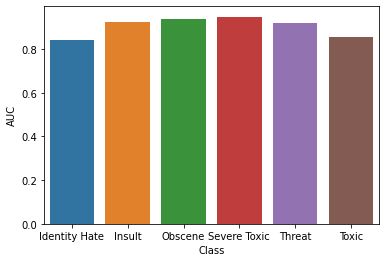

In [ ]:
import seaborn as sns

sns.barplot(data=mets, x="Class", y='AUC')

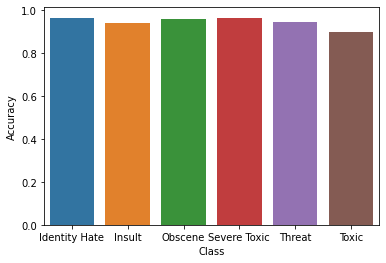

In [ ]:
sns.barplot(data=mets, x="Class", y='Accuracy')


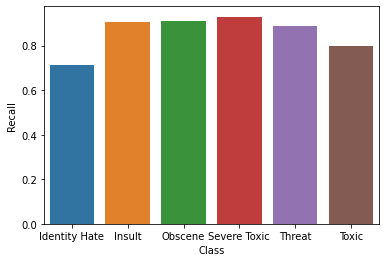

In [ ]:
sns.barplot(data=mets, x="Class", y='Recall')

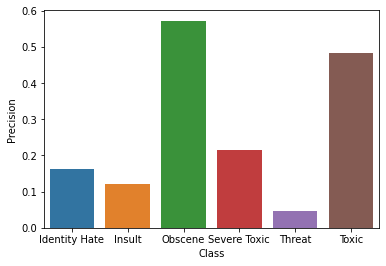

In [ ]:
sns.barplot(data=mets, x="Class", y='Precision')

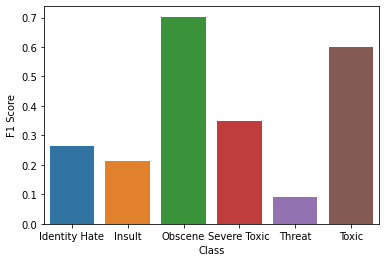

In [ ]:
sns.barplot(data=mets, x="Class", y='F1 Score')

In [ ]:
final[["profanity","sentiment","subjectivity"]].value_counts()


profanity  sentiment  subjectivity
0          1.0        1               88485
                      0               28619
1          1.0        1               13965
                      0                8105
0          2.0        1                8076
           0.0        1                4223
1          0.0        1                4089
0          0.0        0                1191
1          0.0        0                1182
0          2.0        0                 879
1          2.0        1                 646
                      0                 111
dtype: int64

In [ ]:
import pandas as pd

# Base Model Perfomance From Before
colnames = ["Class", "AUC", "Accuracy", "Recall", "Precision", "F1 Score"]

mets = pd.DataFrame([["Identity Hate",  0.6779982808237096, 0.991, 0.3592592592592593, 0.5, 0.4181034482758621],
             ["Insult", 0.5791923608775273, 0.9915666666666667, 0.15925925925925927,0.6231884057971014,0.25368731563421826],
             ["Obscene", 0.8096779255715979, 0.975, 0.6245330012453301, 0.8721739130434782, 0.727866473149492],
             ["Severe Toxic", 0.6115657806901116, 0.9899, 0.2255892255892256, 0.4785714285714286, 0.30663615560640733],
             ["Threat",  0.6345974330588987, 0.9973666666666666,  0.2696629213483146, 0.631578947368421, 0.3779527559055118],
             ["Toxic", 0.7960371242611479, 0.9518666666666666, 0.6034965034965035,0.8477406679764243,0.7050653594771242]])


mets.columns = colnames
mets

,Class,AUC,Accuracy,Recall,Precision,F1 Score
0,Identity Hate,0.677998,0.991000,0.359259,0.500000,0.418103
1,Insult,0.579192,0.991567,0.159259,0.623188,0.253687
2,Obscene,0.809678,0.975000,0.624533,0.872174,0.727866
3,Severe Toxic,0.611566,0.989900,0.225589,0.478571,0.306636
4,Threat,0.634597,0.997367,0.269663,0.631579,0.377953
5,Toxic,0.796037,0.951867,0.603497,0.847741,0.705065
